<a href="https://colab.research.google.com/github/Dheeraj024/neural-network-bagging-/blob/main/mnist_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [277]:
mnist_train = pd.read_csv("mnist_train.csv")
mnist_test = pd.read_csv("mnist_test.csv")

In [281]:
mnist_train = mnist_train.fillna(0)

In [282]:
mnist_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30963,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30964,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30965,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30966,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
def sampling(tdata,val):
    len1= int(len(tdata)*val)
    t1 = tdata.sample(frac=1)
    val_data = t1.iloc[0:len1,:]
    train = t1.iloc[len1:,:]
    return val_data,train

def generator(train,batch_size):
    count = 0
    while count<len(train):
        data = train.iloc[count:count+batch_size,:]
        X = data.iloc[:,1:]
        Y = data.iloc[:,0]
        yield X.values,Y.values
        count+=batch_size

In [284]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.maximum(0, self.z1)  # ReLU activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = np.exp(self.z2 - np.max(self.z2, axis=1, keepdims=True))  # Softmax activation
        self.a2 /= np.sum(self.a2, axis=1, keepdims=True)
        return self.a2

    def backward(self, X, y, learning_rate):
        # Backward pass
        m = X.shape[0]

        dZ2 = self.a2
        dZ2[range(m), y] -= 1
        dZ2 /= m

        dW2 = np.dot(self.a1.T, dZ2)
        db2 = np.sum(dZ2, axis=0)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.a1 > 0)  # ReLU derivative

        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0)

        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        epsilon = 1e-8
        for epoch in range(epochs):
            # Forward pass
            a2 = self.forward(X)

            # Compute loss
            loss = -np.sum(np.log(a2[range(X.shape[0]), y]+epsilon)) / X.shape[0]

            # Backward pass
            self.backward(X, y, learning_rate)

            # Print loss
            # if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        # Predict class labels
        a2 = self.forward(X)
        y_pred = np.argmax(a2, axis=1)
        return y_pred

# Create and train the neural network

In [285]:
x_train = mnist_train.iloc[:,1:]

In [286]:
x_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30963,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30964,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30965,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30966,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def transform(self, X):
        X_scaled = (X - self.mean) / self.std
        return X_scaled
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [288]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
x_train= scaler.fit_transform(x_train)

In [289]:
x_train = x_train.fillna(0)

In [290]:
x_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035069,-0.027551,-0.019307,-0.014748,-0.01148,-0.005683,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035069,-0.027551,-0.019307,-0.014748,-0.01148,-0.005683,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035069,-0.027551,-0.019307,-0.014748,-0.01148,-0.005683,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035069,-0.027551,-0.019307,-0.014748,-0.01148,-0.005683,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035069,-0.027551,-0.019307,-0.014748,-0.01148,-0.005683,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035069,-0.027551,-0.019307,-0.014748,-0.01148,-0.005683,0.0,0.0,0.0,0.0
30964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035069,-0.027551,-0.019307,-0.014748,-0.01148,-0.005683,0.0,0.0,0.0,0.0
30965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035069,-0.027551,-0.019307,-0.014748,-0.01148,-0.005683,0.0,0.0,0.0,0.0
30966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035069,-0.027551,-0.019307,-0.014748,-0.01148,-0.005683,0.0,0.0,0.0,0.0


In [291]:
y_train = mnist_train.iloc[:,0]
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [292]:
type(y_train)

pandas.core.series.Series

In [293]:
x_test = mnist_test.iloc[:,1:]
y_test = mnist_test.iloc[:,0]

In [294]:
nn = NeuralNetwork(x_train.shape[1],128,10)

In [295]:
nn.train(x_train,y_train,30,0.001)

Epoch 0, Loss: 2.3025
Epoch 1, Loss: 2.3025
Epoch 2, Loss: 2.3024
Epoch 3, Loss: 2.3023
Epoch 4, Loss: 2.3023
Epoch 5, Loss: 2.3022
Epoch 6, Loss: 2.3021
Epoch 7, Loss: 2.3021
Epoch 8, Loss: 2.3020
Epoch 9, Loss: 2.3019
Epoch 10, Loss: 2.3019
Epoch 11, Loss: 2.3018
Epoch 12, Loss: 2.3017
Epoch 13, Loss: 2.3017
Epoch 14, Loss: 2.3016
Epoch 15, Loss: 2.3016
Epoch 16, Loss: 2.3015
Epoch 17, Loss: 2.3014
Epoch 18, Loss: 2.3014
Epoch 19, Loss: 2.3013
Epoch 20, Loss: 2.3012
Epoch 21, Loss: 2.3012
Epoch 22, Loss: 2.3011
Epoch 23, Loss: 2.3010
Epoch 24, Loss: 2.3010
Epoch 25, Loss: 2.3009
Epoch 26, Loss: 2.3008
Epoch 27, Loss: 2.3008
Epoch 28, Loss: 2.3007
Epoch 29, Loss: 2.3007


In [296]:
print(y_test)

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64


In [297]:
prediction = nn.predict(x_test)

In [298]:
prediction

array([6, 8, 4, ..., 1, 0, 1])

In [299]:
model_net = []
for i in range(5):
    validation,train_data = sampling(mnist_train,0.2)
    v_data = validation.iloc[:,1:]
    v_label = validation.iloc[:,0]
    # gen = generator(train_data,8)
    # x,y = gen
    x_data = train_data.iloc[:,1:]
    y_data = train_data.iloc[:,0]
    nn = NeuralNetwork(x_train.shape[1],128,10)
    nn.train(x_data,y_data,50,0.001)
    model_net.append(nn)

Epoch 0, Loss: 3.4528
Epoch 1, Loss: 2.6930
Epoch 2, Loss: 2.0731
Epoch 3, Loss: 1.7416
Epoch 4, Loss: 1.4971
Epoch 5, Loss: 1.3314
Epoch 6, Loss: 1.2016
Epoch 7, Loss: 1.1076
Epoch 8, Loss: 1.0326
Epoch 9, Loss: 0.9717
Epoch 10, Loss: 0.9218
Epoch 11, Loss: 0.8784
Epoch 12, Loss: 0.8423
Epoch 13, Loss: 0.8094
Epoch 14, Loss: 0.7820
Epoch 15, Loss: 0.7559
Epoch 16, Loss: 0.7343
Epoch 17, Loss: 0.7128
Epoch 18, Loss: 0.6951
Epoch 19, Loss: 0.6769
Epoch 20, Loss: 0.6620
Epoch 21, Loss: 0.6463
Epoch 22, Loss: 0.6334
Epoch 23, Loss: 0.6196
Epoch 24, Loss: 0.6081
Epoch 25, Loss: 0.5959
Epoch 26, Loss: 0.5856
Epoch 27, Loss: 0.5748
Epoch 28, Loss: 0.5654
Epoch 29, Loss: 0.5559
Epoch 30, Loss: 0.5473
Epoch 31, Loss: 0.5388
Epoch 32, Loss: 0.5311
Epoch 33, Loss: 0.5235
Epoch 34, Loss: 0.5165
Epoch 35, Loss: 0.5098
Epoch 36, Loss: 0.5034
Epoch 37, Loss: 0.4974
Epoch 38, Loss: 0.4916
Epoch 39, Loss: 0.4861
Epoch 40, Loss: 0.4809
Epoch 41, Loss: 0.4759
Epoch 42, Loss: 0.4712
Epoch 43, Loss: 0.466

In [320]:
label_op = []
input = x_test.iloc[0]
for model in model_net:
    prediction = model.predict(input)
    label_op.append(prediction)
max = 0
res = label_op[0]
for i in label_op:
    freq = label_op.count(i)
    if freq > max:
        max = freq
        res = i
print(label_op)        
print(res)

[array([7]), array([7]), array([7]), array([7]), array([7])]
[7]


In [301]:
y_test[24]

4

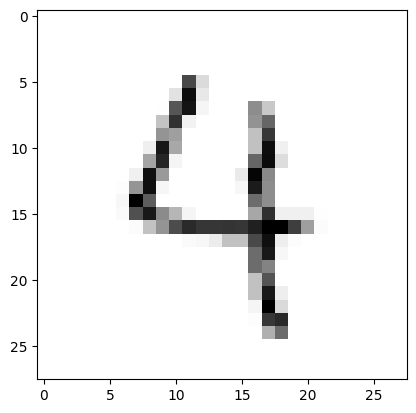

In [308]:
image1 = np.asarray(x_test.iloc[24,:]).reshape((28,28))
plt.imshow(image1,cmap="Greys",interpolation="None")


In [313]:
x_test.iloc[0]

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 784, dtype: int64

In [321]:
y_pred = []
label_op = []
for i in range(len(x_test)):
  input = x_test.iloc[i]
  for model in model_net:
      prediction = model.predict(input)
      label_op.append(prediction)
  max = 0
  res = label_op[0]
  for i in label_op:
      freq = label_op.count(i)
      if freq > max:
          max = freq
          res = i
  label_op.clear()
  y_pred.append(res)      
print(y_pred)

[array([7]), array([2]), array([1]), array([0]), array([4]), array([1]), array([4]), array([9]), array([6]), array([9]), array([0]), array([6]), array([9]), array([0]), array([1]), array([5]), array([9]), array([7]), array([3]), array([4]), array([9]), array([6]), array([6]), array([5]), array([4]), array([0]), array([7]), array([4]), array([0]), array([1]), array([3]), array([1]), array([3]), array([6]), array([7]), array([2]), array([7]), array([1]), array([2]), array([1]), array([1]), array([7]), array([4]), array([2]), array([3]), array([5]), array([3]), array([2]), array([4]), array([4]), array([6]), array([3]), array([5]), array([5]), array([2]), array([0]), array([4]), array([1]), array([9]), array([5]), array([7]), array([8]), array([9]), array([2]), array([7]), array([4]), array([2]), array([4]), array([3]), array([0]), array([7]), array([0]), array([2]), array([9]), array([1]), array([7]), array([3]), array([7]), array([9]), array([7]), array([7]), array([6]), array([2]), arr

In [322]:
y_test

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [323]:

from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are your true and predicted labels
cm = accuracy_score(y_test, y_pred)
print(cm)

0.8996
